# Problem 1: Data with R

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


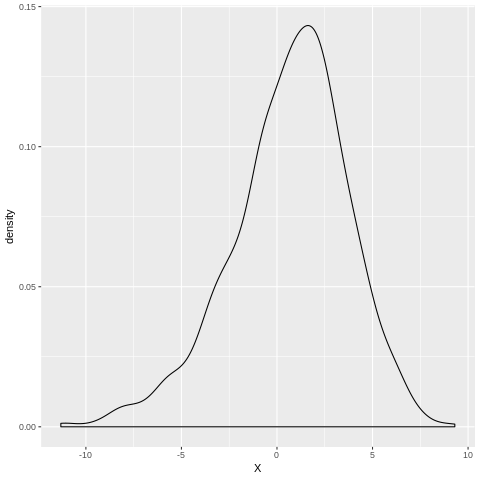

In [129]:
%%R
##What I was able to correctly do up until the point of submission:


# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!

dat %>%
    ggplot(aes(x = X)) +
    geom_density() 

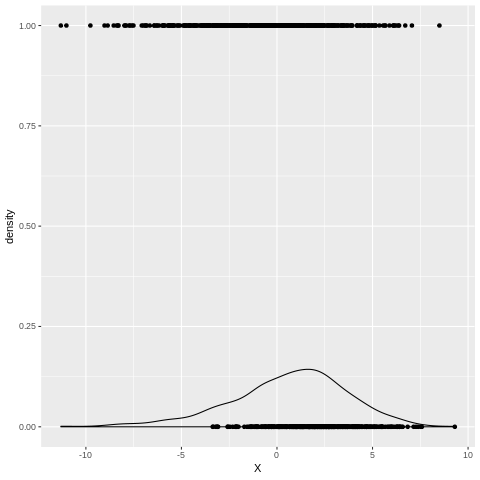

In [137]:
%%R
##What I was able to attempt with plotting the lab do up until the point of submission:




# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!

dat %>%
    ggplot(aes(x = X)) +
    geom_density() +
    geom_point(aes(x = X,y = label))

# Problem 2: Using Classes in Python

In [38]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [16]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [32]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)
import random

random.shuffle(dat)

In [34]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [47]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data

train_list = []
test_list = []

for i in range(0, 700):
        train_list.append(dat[i])
        
for i in range (700, 1000):
        test_list.append(dat[i])
        
print(len(train_list))
print(len(test_list))

700
300


In [76]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

train_list_X = []
train_list_labels = []
test_list_X = []
test_list_labels = []

for i in range(0, len(train_list)):
        train_list_X = [item[0] for item in train_list]
        train_list_labels = [item[1] for item in train_list]

for i in range(0, len(test_list)):
        test_list_X = [item[0] for item in test_list]
        test_list_labels = [item[1] for item in test_list]


300


## Problem 2.3: Testing models!

In [100]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label

Near_predicts = []
Far_predicts = []

Inst1 = KNearestNeighbors(5)
Inst1.fit(train_list_X, train_list_labels)
for i in range(0, len(test_list)):
    Near_predicts.append(Inst1.predict(test_list_X[i]))
    
Inst2 = KFurthestNeighbors(5)
Inst2.fit(train_list_X, train_list_labels)
for i in range(0, len(test_list)):
    Far_predicts.append(Inst2.predict(test_list_X[i]))


In [106]:
# Compare the two classes of models!
count_near = 0
count_far = 0

for i in range(0, len(Near_predicts)):
    if Near_predicts[i] == test_list_labels[i]:
        count_near = count_near + 1

for i in range(0, len(Far_predicts)):
    if Far_predicts[i] == test_list_labels[i]:
        count_far = count_far + 1
        
print(count_near)
print(count_far)

print(count_near/len(test_list_labels))
print(count_far/len(test_list_labels))

201
197
0.67
0.6566666666666666
